In [1]:
%pip install pandas numpy matplotlib seaborn regex  sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
import pandas as pd
import numpy as np
import os
import regex as re
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Dataset of disease-symptom associations.

In [3]:
df = pd.read_csv(r'datasets\raw_data.csv', engine='python')

# Count the number of non-NA/null observations in each column
df.count()

Disease                         134
Count of Disease Occurrence     134
Symptom                        1865
dtype: int64

Check for null or invalid entries

In [5]:
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [6]:
df = df.fillna(0)

In [7]:
fill = df['Disease'].iloc[0]
for i in range(1,1867):
    if df['Disease'].iloc[i] == 0:
        df['Disease'].iloc[i] = fill
    else:
        fill = df['Disease'].iloc[i]
df['Disease']

C:\Users\srikr\AppData\Local\Temp\ipykernel_21968\3525003240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease'].iloc[i] = fill
C:\Users\srikr\AppData\Local\Temp\ipykernel_21968\3525003240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease'].iloc[i] = fill
C:\Users\srikr\AppData\Local\Temp\ipykernel_21968\3525003240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease'].iloc[i] = fill
C:\Users\srik

0       UMLS:C0020538_hypertensive disease
1       UMLS:C0020538_hypertensive disease
2       UMLS:C0020538_hypertensive disease
3       UMLS:C0020538_hypertensive disease
4       UMLS:C0020538_hypertensive disease
                       ...                
1862           UMLS:C0233472_affect labile
1863         UMLS:C0011127_decubitus ulcer
1864         UMLS:C0011127_decubitus ulcer
1865         UMLS:C0011127_decubitus ulcer
1866         UMLS:C0011127_decubitus ulcer
Name: Disease, Length: 1867, dtype: object

In [8]:
fill = df['Count of Disease Occurrence'].iloc[0]
for i in range(1,1867):
    if df['Count of Disease Occurrence'].iloc[i] == 0.0:
        df['Count of Disease Occurrence'].iloc[i] = fill
    else:
        fill = df['Count of Disease Occurrence'].iloc[i]
df['Count of Disease Occurrence']

C:\Users\srikr\AppData\Local\Temp\ipykernel_21968\727697979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count of Disease Occurrence'].iloc[i] = fill
C:\Users\srikr\AppData\Local\Temp\ipykernel_21968\727697979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count of Disease Occurrence'].iloc[i] = fill
C:\Users\srikr\AppData\Local\Temp\ipykernel_21968\727697979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C

0       3363.0
1       3363.0
2       3363.0
3       3363.0
4       3363.0
         ...  
1862      45.0
1863      42.0
1864      42.0
1865      42.0
1866      42.0
Name: Count of Disease Occurrence, Length: 1867, dtype: float64

In [9]:
df = df[df.Symptom != 0]
df

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall
...,...,...,...
1861,UMLS:C0233472_affect labile,45.0,UMLS:C0425251_bedridden^UMLS:C0741453_bedridden
1862,UMLS:C0233472_affect labile,45.0,UMLS:C0242453_prostatism
1863,UMLS:C0011127_decubitus ulcer,42.0,UMLS:C0232257_systolic murmur
1864,UMLS:C0011127_decubitus ulcer,42.0,UMLS:C0871754_frail


In [10]:
df['Symptom'] = df['Symptom'].apply(lambda x: x.split('^'))
df['Symptom']

0                              [UMLS:C0008031_pain chest]
1                     [UMLS:C0392680_shortness of breath]
2                               [UMLS:C0012833_dizziness]
3                                [UMLS:C0004093_asthenia]
4                                    [UMLS:C0085639_fall]
                              ...                        
1861    [UMLS:C0425251_bedridden, UMLS:C0741453_bedrid...
1862                           [UMLS:C0242453_prostatism]
1863                      [UMLS:C0232257_systolic murmur]
1864                                [UMLS:C0871754_frail]
1865                                [UMLS:C0015967_fever]
Name: Symptom, Length: 1865, dtype: object

In [11]:
df = df.explode('Symptom').reset_index()

In [12]:
df.Symptom = df.Symptom.apply(lambda x: x.split('_')[1])
df

,index,Disease,Count of Disease Occurrence,Symptom
0,0,UMLS:C0020538_hypertensive disease,3363.0,pain chest
1,1,UMLS:C0020538_hypertensive disease,3363.0,shortness of breath
2,2,UMLS:C0020538_hypertensive disease,3363.0,dizziness
3,3,UMLS:C0020538_hypertensive disease,3363.0,asthenia
4,4,UMLS:C0020538_hypertensive disease,3363.0,fall
...,...,...,...,...
1902,1861,UMLS:C0233472_affect labile,45.0,bedridden
1903,1862,UMLS:C0233472_affect labile,45.0,prostatism
1904,1863,UMLS:C0011127_decubitus ulcer,42.0,systolic murmur
1905,1864,UMLS:C0011127_decubitus ulcer,42.0,frail


Cleaned dataset

In [13]:
df['Disease'] = df['Disease'].apply(lambda x: x.split('^'))
df = df.explode('Disease').reset_index()
df.Disease = df.Disease.apply(lambda x: x.split('_')[1])
df

,level_0,index,Disease,Count of Disease Occurrence,Symptom
0,0,0,hypertensive disease,3363.0,pain chest
1,1,1,hypertensive disease,3363.0,shortness of breath
2,2,2,hypertensive disease,3363.0,dizziness
3,3,3,hypertensive disease,3363.0,asthenia
4,4,4,hypertensive disease,3363.0,fall
...,...,...,...,...,...
2124,1902,1861,affect labile,45.0,bedridden
2125,1903,1862,affect labile,45.0,prostatism
2126,1904,1863,decubitus ulcer,42.0,systolic murmur
2127,1905,1864,decubitus ulcer,42.0,frail


In [14]:
df.drop(['index', 'level_0','Count of Disease Occurrence'], axis = 1, inplace = True)
df

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall
...,...,...
2124,affect labile,bedridden
2125,affect labile,prostatism
2126,decubitus ulcer,systolic murmur
2127,decubitus ulcer,frail


In [15]:
df_sparse = pd.get_dummies(df, columns = ['Symptom']).drop('Symptom_', axis=1).drop_duplicates()
df_sparse.head()

,Disease,Symptom_Heberden's node,Symptom_Murphy's sign,Symptom_Stahli's line,Symptom_abdomen acute,Symptom_abdominal bloating,Symptom_abdominal tenderness,Symptom_abnormal sensation,Symptom_abnormally hard consistency,Symptom_abortion,...,Symptom_vision blurred,Symptom_vomiting,Symptom_weepiness,Symptom_weight gain,Symptom_welt,Symptom_wheelchair bound,Symptom_wheezing,Symptom_withdraw,Symptom_worry,Symptom_yellow sputum
0,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df_sparse = df_sparse.groupby('Disease').sum().reset_index()
df_sparse.head()

,Disease,Symptom_Heberden's node,Symptom_Murphy's sign,Symptom_Stahli's line,Symptom_abdomen acute,Symptom_abdominal bloating,Symptom_abdominal tenderness,Symptom_abnormal sensation,Symptom_abnormally hard consistency,Symptom_abortion,...,Symptom_vision blurred,Symptom_vomiting,Symptom_weepiness,Symptom_weight gain,Symptom_welt,Symptom_wheelchair bound,Symptom_wheezing,Symptom_withdraw,Symptom_worry,Symptom_yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pneumocystis carinii pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accident cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquired immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = df_sparse[df_sparse.columns[1:]]
Y = df_sparse['Disease']

classifier to learn diseases from the symptoms

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier()
xgb_clf.fit(X, Y)
score = xgb_clf.score(X, Y)
print(score)

0.8993288590604027


In [22]:
print ("DecisionTree")
clf = DecisionTreeClassifier()
model = clf.fit(X,Y)
print ("Acurracy: ", model.score(X,Y))

DecisionTree
Acurracy:  0.8993288590604027


In [23]:
model.predict(x_test)

array(['sepsis (invertebrate)', 'neutropenia', 'failure heart congestive',
       'hypertensive disease', 'affect labile',
       'mitral valve insufficiency', 'tachycardia sinus',
       'carcinoma breast', 'paranoia', 'incontinence', 'confusion',
       'dependence', 'encephalopathy', 'cardiomyopathy',
       'deep vein thrombosis', 'schizophrenia', 'obesity morbid',
       'hernia\xa0hiatal', 'bipolar disorder', 'depression mental',
       'dehydration', 'anemia', 'infection', 'carcinoma of lung',
       'gastritis', 'lymphoma', 'ketoacidosis diabetic', 'cholecystitis',
       'dementia', 'sepsis (invertebrate)'], dtype=object)

In [24]:
model.score(x_test, y_test)

0.9333333333333333

In [25]:
input_data = pd.read_csv(r'datasets\Training.csv')
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [26]:
test_data = pd.read_csv(r'datasets\test_data.csv')
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [27]:
input_data.shape

(4920, 133)

Check for any Null values

In [28]:
input_data.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

See the Target Variable Distribution

In [29]:
input_data['prognosis'].value_counts(normalize = True)

prognosis
Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D          

diseases having the same percentage through bar chart

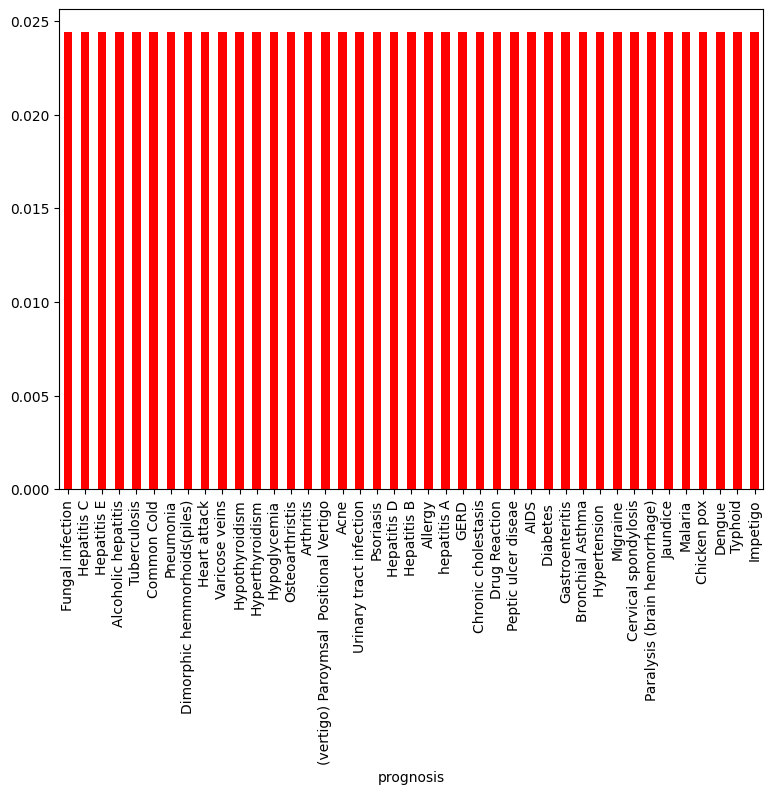

In [30]:
#as we can see each no. diseases having the same percentage through bar chart
input_data['prognosis'].value_counts(normalize = True).plot.bar(color='red')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

relationship between the variables by applying the correlation

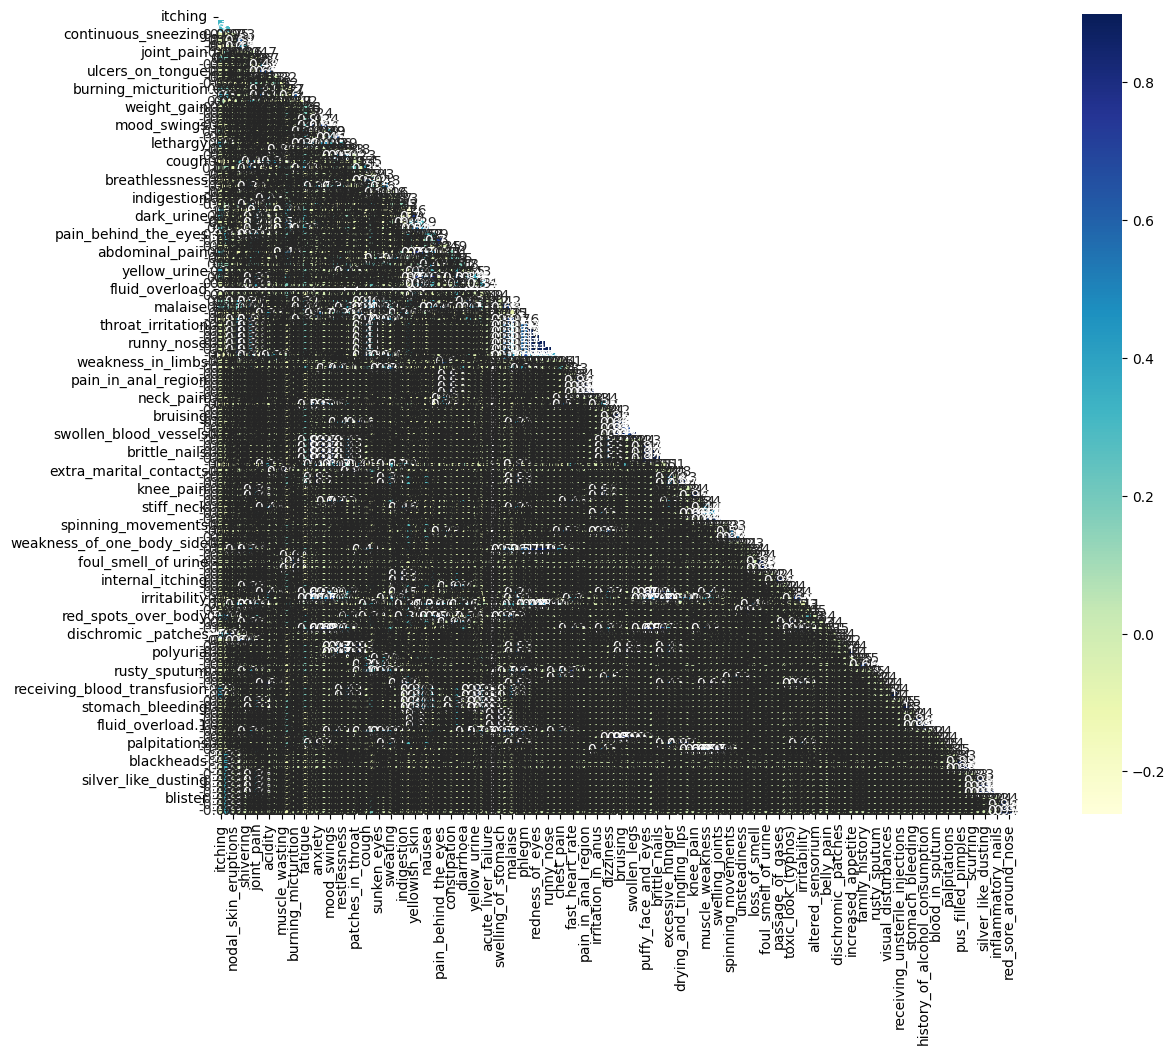

In [31]:
# Drop non-numeric columns
numeric_data = input_data.select_dtypes(include=[np.number])

# Check the correlation between numeric variables
corr = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()


In [32]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,4800,6
1,6,108


In [33]:
#imported the chi square contingency
from scipy.stats import chi2_contingency
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain']))

Chi2ContingencyResult(statistic=4362.40173527245, pvalue=0.0, dof=1, expected_freq=array([[4.69464146e+03, 1.11358537e+02],
       [1.11358537e+02, 2.64146341e+00]]))

In [34]:
x = input_data.drop(['prognosis'],axis =1)
y = input_data['prognosis']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

score = mnb.score(x_test, y_test)
print("Accuracy Score: ",score)

Accuracy Score:  1.0


In [37]:
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(x_train, y_train)
score = gbm_clf.score(x_train, y_train)
print(score)

1.0


K-Fold Cross-Validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


In [39]:
scores = cross_val_score(gbm_clf, x_test, y_test, cv=10)
print (scores)
print (scores.mean())

[1.         0.99386503 0.99386503 1.         0.98765432 0.99382716
 0.98148148 0.98765432 0.9691358  1.        ]
0.9907483147769446


In [40]:
real_diseases = y_test.values
y_pred = gbm_clf.predict(x_test)
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, 20):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))


Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis


In [41]:
#imported Kfold
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = input_data
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [43]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb, 'G_B' : gbm}
algo_train_scores={}
algo_test_scores={}

Gradient Boosted Tree is the most efficient algorithm with K=2

In [44]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(input_data,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g


kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
G_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8731707317073171, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 0.9792682926829268, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


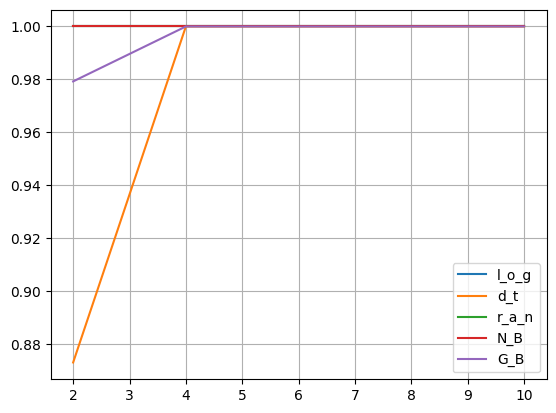

In [45]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

df_test.plot(grid = 1)
plt.show()

In [46]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = input_data
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = gbm.fit(x_train,y_train)
        sum_train += gbm.score(x_train,y_train)
        y_pred = gbm.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)

kvalue:  2


In [47]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.9792682926829268}


In [48]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming `input_data` is your DataFrame and `gbm` is your model
test_scores = {}
train_scores = {}
k_values = [2, 4]  # You can extend this list if needed

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for each iteration
    'max_depth': [3, 4, 5]  # Maximum tree depth
}

for k in k_values:
    kf = KFold(n_splits=k)
    sum_train = 0
    sum_test = 0
    data = input_data
    
    # Prepare for hyperparameter tuning
    grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), 
                               param_grid=param_grid, 
                               scoring='accuracy', 
                               cv=kf,  # Using KFold splits for cross-validation
                               n_jobs=-1)  # Use all available cores

    for train, test in kf.split(data):
        train_data = data.iloc[train, :]
        test_data = data.iloc[test, :]
        x_train = train_data.drop(["prognosis"], axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"], axis=1)
        y_test = test_data["prognosis"]
        
        # Fit the model with hyperparameter tuning
        grid_search.fit(x_train, y_train)

        # Get the best model from grid search
        best_model = grid_search.best_estimator_
        
        # Evaluate the model
        sum_train += best_model.score(x_train, y_train)
        y_pred = best_model.predict(x_test)
        sum_test += accuracy_score(y_test, y_pred)

    average_test = sum_test / k
    average_train = sum_train / k
    test_scores[k] = average_test
    train_scores[k] = average_train
    print("k value:", k)
    print("Best parameters found: ", grid_search.best_params_)


k value: 2
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
k value: 4
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


Important Features

In [49]:
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

In [50]:
features = input_data.columns[:-1]
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 36 - pain_behind_the_eyes (0.032985)
2. feature 118 - blood_in_sputum (0.024728)
3. feature 108 - rusty_sputum (0.024399)
4. feature 109 - lack_of_concentration (0.021877)
5. feature 86 - unsteadiness (0.021725)


In [51]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

Test the model
Take two symptom 'redness_of_eyes' and 'cough'

In [52]:
feature_dict['redness_of_eyes'], feature_dict['cough']

(52, 24)

In [53]:
sample_x = [i/52 if i ==52 else i/24 if i==24 else i*0 for i in range(len(features))]
len(sample_x)

132

In [54]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
gbm.predict(sample_x)

C:\Users\srikr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['Common Cold'], dtype=object)

we got the result that it is a symptom of Common Cold

In [55]:
gbm.predict_proba(sample_x)

C:\Users\srikr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([[0.02358118, 0.02518329, 0.02518329, 0.01395163, 0.02619084,
        0.02116216, 0.02517268, 0.02172293, 0.02625356, 0.0810185 ,
        0.12552971, 0.01318602, 0.01791812, 0.02336436, 0.02366534,
        0.02782802, 0.02186204, 0.02832723, 0.02083979, 0.01135729,
        0.0186555 , 0.03558507, 0.01043275, 0.01638447, 0.01784681,
        0.0151447 , 0.01821149, 0.02374932, 0.01222645, 0.01915208,
        0.01898098, 0.01966836, 0.02649837, 0.01951805, 0.01814496,
        0.01901244, 0.01043219, 0.02100551, 0.02334434, 0.02227605,
        0.01043212]])

In [56]:
gbm.__getstate__()

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': None,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breat

In [57]:
symptoms = x.columns

In [58]:
regex = re.compile('_')

In [59]:
symptoms = [i if regex.search(i) == None else i.replace('_', ' ') for i in symptoms ]

In [60]:
# Function to find all close matches of  
# input string in given list of possible strings 
from difflib import get_close_matches  
def closeMatches(patterns, word): 
    print(get_close_matches(word, patterns, n=2, cutoff=0.7))

In [61]:
word = 'sivering'
closeMatches(symptoms, word)

['shivering']


In [62]:
%pip install flashtext
from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(symptoms)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
text = 'I have itching, joint pain and fatigue'
keyword_processor.extract_keywords(text)

['itching', 'joint pain', 'fatigue']

In [64]:
def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        print('Predicted Disease: ',gbm.predict(sample_x)[0])

In [65]:
query = 'I have redness of eyes and cough'

In [66]:
predict_disease(query)

['redness_of_eyes', 'cough']
Predicted Disease:  Common Cold


C:\Users\srikr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [67]:
symptoms[:20]

['itching',
 'skin rash',
 'nodal skin eruptions',
 'continuous sneezing',
 'shivering',
 'chills',
 'joint pain',
 'stomach pain',
 'acidity',
 'ulcers on tongue',
 'muscle wasting',
 'vomiting',
 'burning micturition',
 'spotting  urination',
 'fatigue',
 'weight gain',
 'anxiety',
 'cold hands and feets',
 'mood swings',
 'weight loss']